Image Classification using DNN and CNN

In [135]:
# Importing Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Setting a fixed random seed for reproducibility
torch.manual_seed(99)
random.seed(99)
np.random.seed(99)

# Device in which we will be working (CPU or GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Ignore all the warnings
import warnings
warnings.filterwarnings("ignore")

cpu


In [136]:
# Loading the datasets
fashion_train = pd.read_csv("C:/CMI/MSc/dataset/fashion-mnist_train.csv")
fashion_test = pd.read_csv("C:/CMI/MSc/dataset/fashion-mnist_test.csv")
sign_train = pd.read_csv("C:/CMI/MSc/dataset/sign_mnist_train.csv")
sign_test = pd.read_csv("C:/CMI/MSc/dataset/sign_mnist_test.csv")

In [137]:
# Splitting data into features and labels
fashion_X_train = fashion_train.drop("label", axis = 1)
fashion_y_train = fashion_train["label"]
fashion_X_test = fashion_test.drop("label", axis = 1)
fashion_y_test = fashion_test["label"]

sign_X_train = sign_train.drop("label", axis = 1)
sign_y_train = sign_train["label"]
sign_X_test = sign_test.drop("label", axis = 1)
sign_y_test = sign_test["label"]

In [138]:
# Standardizing the data
scaler = StandardScaler()
fashion_X_train = scaler.fit_transform(fashion_X_train)
fashion_X_test = scaler.transform(fashion_X_test)

scaler = StandardScaler()
sign_X_train = scaler.fit_transform(sign_X_train)
sign_X_test = scaler.transform(sign_X_test)

In [139]:
# Converting Pandas DataFrame to PyTorch tensors
fashion_X_train = torch.tensor(fashion_X_train, dtype = torch.float32)
fashion_y_train = torch.tensor(fashion_y_train, dtype = torch.long)
fashion_X_test = torch.tensor(fashion_X_test, dtype = torch.float32)
fashion_y_test = torch.tensor(fashion_y_test, dtype = torch.long)

sign_X_train = torch.tensor(sign_X_train, dtype = torch.float32)
sign_y_train = torch.tensor(sign_y_train, dtype = torch.long)
sign_X_test = torch.tensor(sign_X_test, dtype = torch.float32)
sign_y_test = torch.tensor(sign_y_test, dtype = torch.long)

In [140]:
# Create a DataLoader for training data
batch_size = 64

fashion_train_dataset = TensorDataset(fashion_X_train, fashion_y_train)
fashion_train_loader = DataLoader(fashion_train_dataset, batch_size=batch_size, shuffle=True)

sign_train_dataset = TensorDataset(sign_X_train, sign_y_train)
sign_train_loader = DataLoader(sign_train_dataset, batch_size=batch_size, shuffle=True)

In [141]:
# Define our DNN model (for the Fashion MNIST)
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)  
        self.fc2 = nn.Linear(256, 128)  
        self.fc3 = nn.Linear(128, 10)   

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Plotting some sample images from Fashion MNIST

In [142]:
# Obtaining the class labels from Kaggle
fashion_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

s = 'ABCDEFGHIJKLMNOPQRSTUVWXY'
sign_labels = {i:letter for i,letter in enumerate(list(s))}


Plotting some sample images from Fashion MNIST dataset

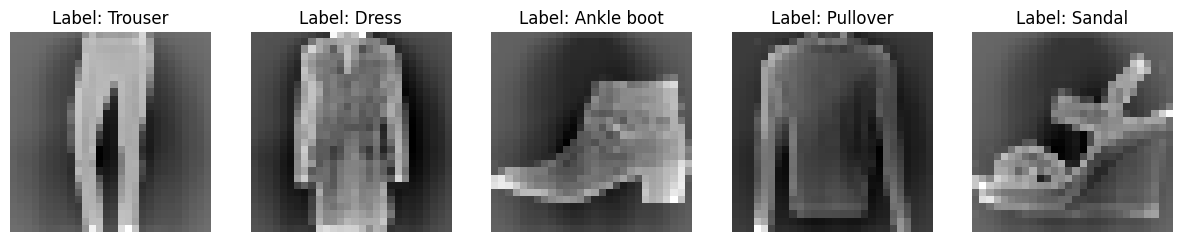

In [143]:
def plot_sample_images_fashion(data_loader, num_samples=5):
    # Get an iterator for the data loader
    data_iter = iter(data_loader)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    
    # Get and plot the sample images
    for i in range(num_samples):
        images, labels = next(data_iter)
        image = images[0].numpy()
        label = fashion_labels[labels[0].item()]
        
        # Reshape the image to its original shape (assuming it was flattened)
        if len(image.shape) == 1:
            image = image.reshape(28, 28)  # Change these dimensions if needed
            
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    
    plt.show()
# Example usage for your fashion_train_loader and sign_train_loader
plot_sample_images_fashion(fashion_train_loader, num_samples=5)



Plotting some sample images from Sign Langauge dataset

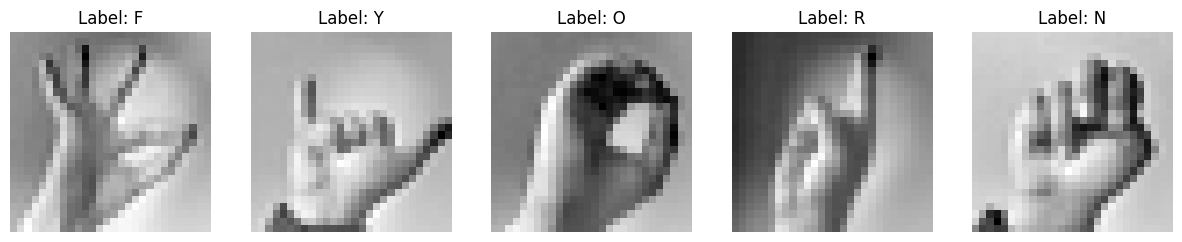

In [144]:

def plot_sample_images_sign(data_loader, num_samples=5):
    # Get an iterator for the data loader
    data_iter = iter(data_loader)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    
    # Get and plot the sample images
    for i in range(num_samples):
        images, labels = next(data_iter)
        image = images[0].numpy()
        label = sign_labels[labels[0].item()]
        
        # Reshape the image to its original shape (assuming it was flattened)
        if len(image.shape) == 1:
            image = image.reshape(28, 28)  # Change these dimensions if needed
            
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    
    plt.show()

plot_sample_images_sign(sign_train_loader,num_samples=5)

In [145]:
# Deploying the model on Fashion MNIST

model_1 = DNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)


# Training loop (for Fashion MNIST)
epochs = 10
for epoch in range(epochs):
    model_1.train()
    total_loss = 0.0
    for batch_X, batch_y in fashion_train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move the data to the GPU
        optimizer.zero_grad()
        outputs = model_1(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {total_loss / len(fashion_train_loader):.4f}')

Epoch [1/10] Loss: 0.4389
Epoch [2/10] Loss: 0.3298
Epoch [3/10] Loss: 0.2884
Epoch [4/10] Loss: 0.2634
Epoch [5/10] Loss: 0.2409
Epoch [6/10] Loss: 0.2216
Epoch [7/10] Loss: 0.2047
Epoch [8/10] Loss: 0.1901
Epoch [9/10] Loss: 0.1737
Epoch [10/10] Loss: 0.1636


In [146]:
# Evaluating our model on the test set
model_1.eval()
fashion_X_test, fashion_y_test = fashion_X_test.to(device), fashion_y_test.to(device)  # Move the test data to the GPU
with torch.no_grad():
    test_outputs = model_1(fashion_X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == fashion_y_test).sum().item() / fashion_y_test.size(0)
    print(f'Test Accuracy of DNN on Fashion MNIST: {accuracy * 100:.2f}%')

Test Accuracy of DNN on Fashion MNIST: 89.35%


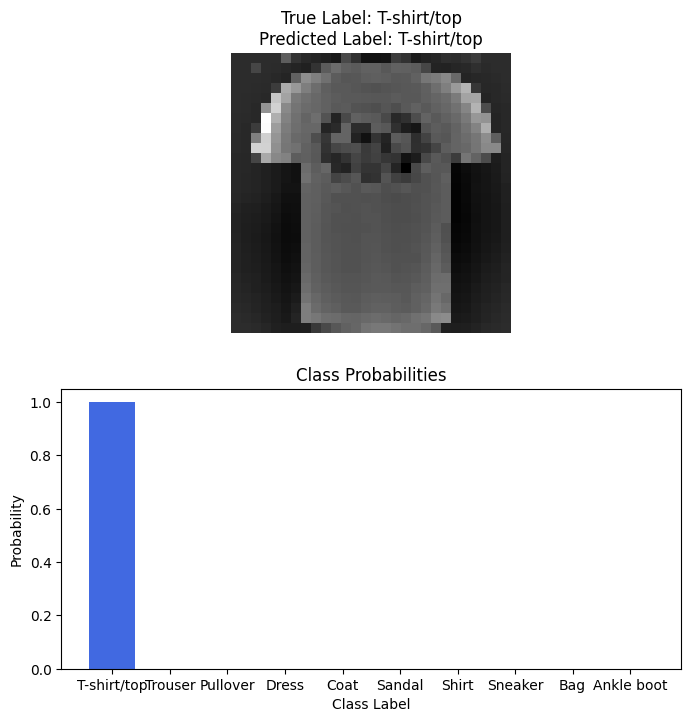

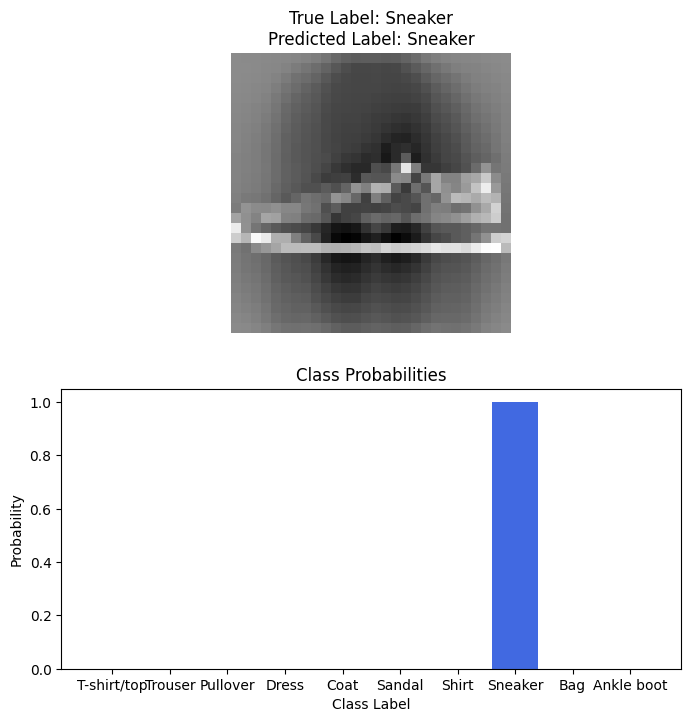

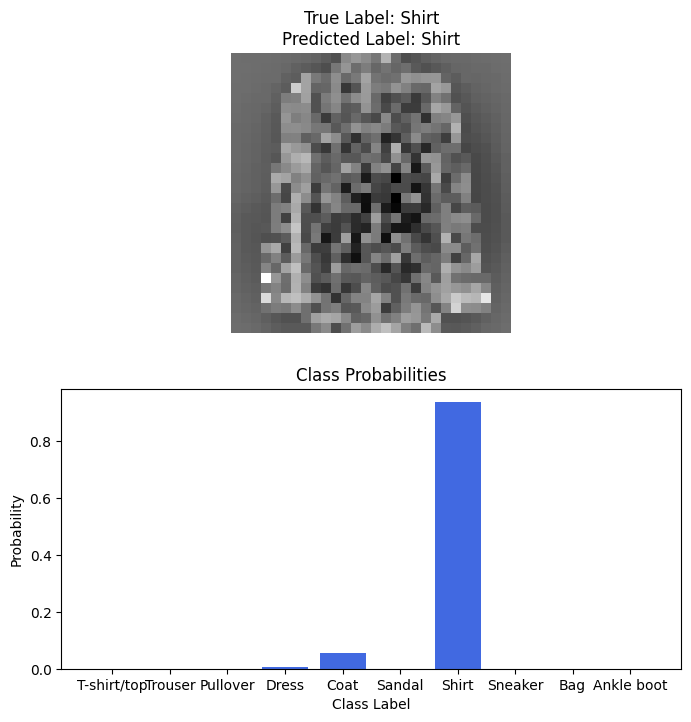

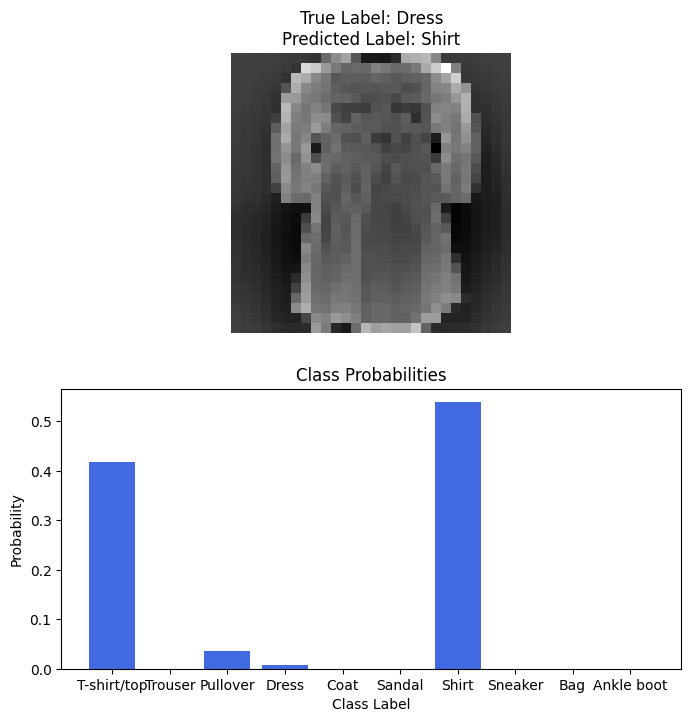

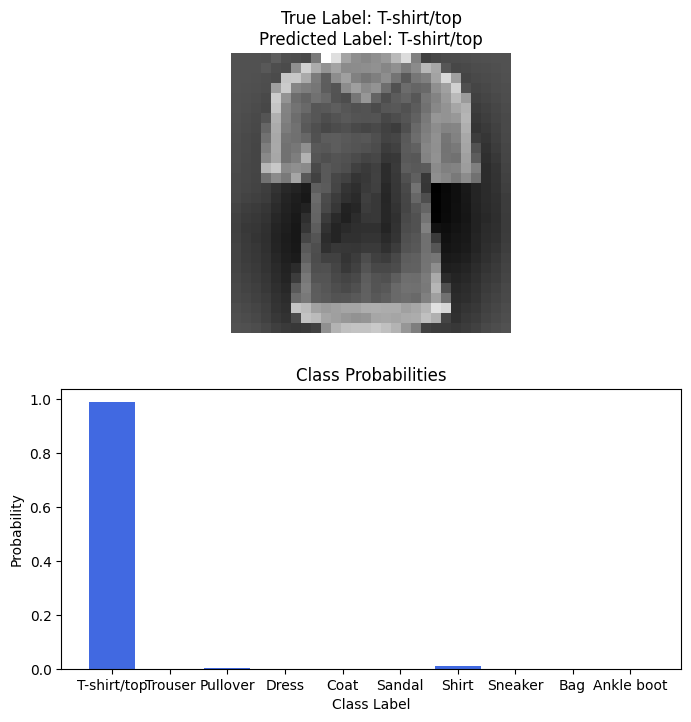

In [147]:
# Function to display a flattened image along with its predicted class and probability as a bar graph
def show_prediction(image, true_label, predicted_label, probabilities, class_labels):
    image = image.reshape(28, 28)  # Reshape the flattened image to (28, 28)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {true_label}\nPredicted Label: {predicted_label}')
    plt.axis('off')
    
    plt.subplot(2, 1, 2)
    plt.bar(class_labels, probabilities, color='royalblue')
    plt.xlabel('Class Label')
    plt.ylabel('Probability')
    plt.title('Class Probabilities')
    
    plt.show()

# Set the model to evaluation mode
model_1.eval()

# Choose some random test samples to display
num_samples_to_display = 5
random_indices = np.random.choice(len(fashion_X_test), num_samples_to_display, replace=False)

class_labels = fashion_labels.values()# Replace with your list 'a'

for i in random_indices:
    image = fashion_X_test[i].cpu().numpy()  # Convert image tensor to NumPy array
    true_label = fashion_y_test[i].item()

    with torch.no_grad():
        test_output = model_1(fashion_X_test[i].unsqueeze(0))  # Model prediction for a single image
        predicted_label = test_output.argmax().item()
        probabilities = torch.softmax(test_output, dim=1).squeeze().cpu().numpy()

    show_prediction(image, fashion_labels[true_label], fashion_labels[predicted_label], probabilities, class_labels)


In [148]:
# Define our DNN model (for the Sign MNIST)
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)  # Input: 784 features, Output: 256 units
        self.fc2 = nn.Linear(256, 128)  # Input: 256 units, Output: 128 units
        self.fc3 = nn.Linear(128, 25)   # Input: 128 units, Output: 25 units

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [149]:
# Deploying the model on Sign MNIST

model_2 = DNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.001)


# Training loop (for Sign MNIST)
epochs = 6
for epoch in range(epochs):
    model_2.train()
    total_loss = 0.0
    for batch_X, batch_y in sign_train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move the data to the GPU
        optimizer.zero_grad()
        outputs = model_2(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {total_loss / len(sign_train_loader):.4f}')

Epoch [1/6] Loss: 0.5141
Epoch [2/6] Loss: 0.0070
Epoch [3/6] Loss: 0.0020
Epoch [4/6] Loss: 0.0010
Epoch [5/6] Loss: 0.0005
Epoch [6/6] Loss: 0.0003


In [150]:
# Evaluating our model on the test set
model_2.eval()
sign_X_test, sign_y_test = sign_X_test.to(device), sign_y_test.to(device)  # Move the test data to the GPU
with torch.no_grad():
    test_outputs = model_2(sign_X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == sign_y_test).sum().item() / sign_y_test.size(0)
    print(f'Test Accuracy of DNN on Sign MNIST: {accuracy * 100:.2f}%')

Test Accuracy of DNN on Sign MNIST: 83.25%


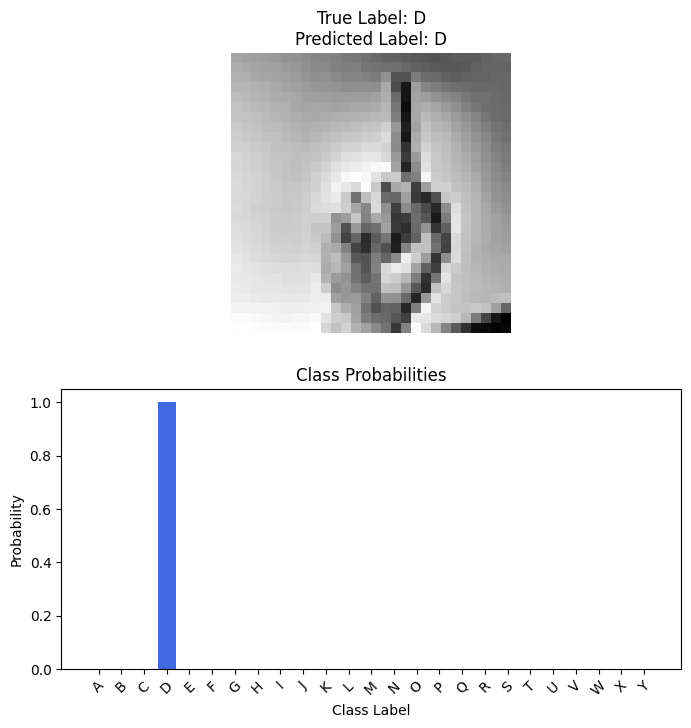

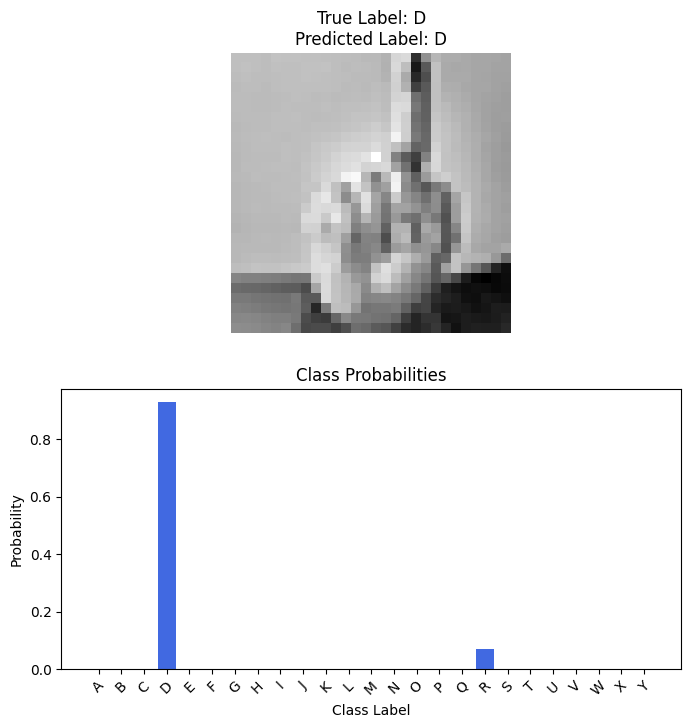

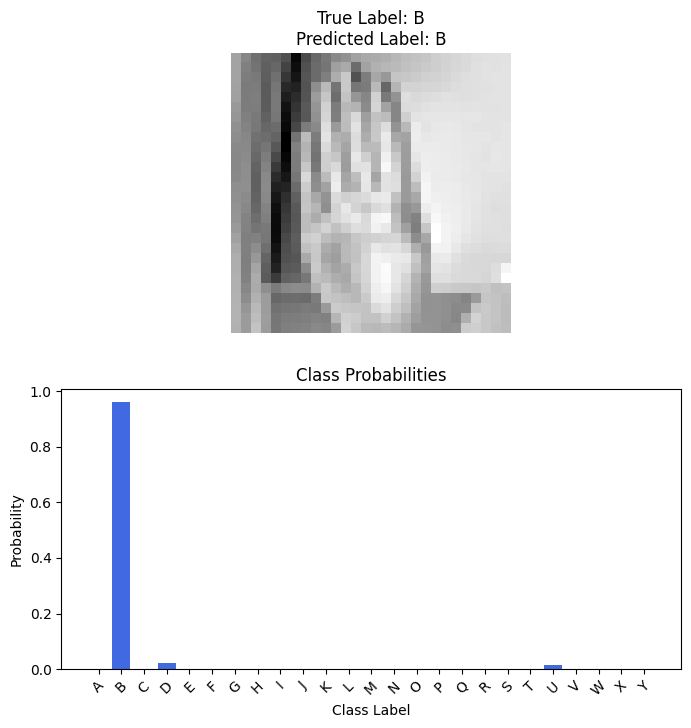

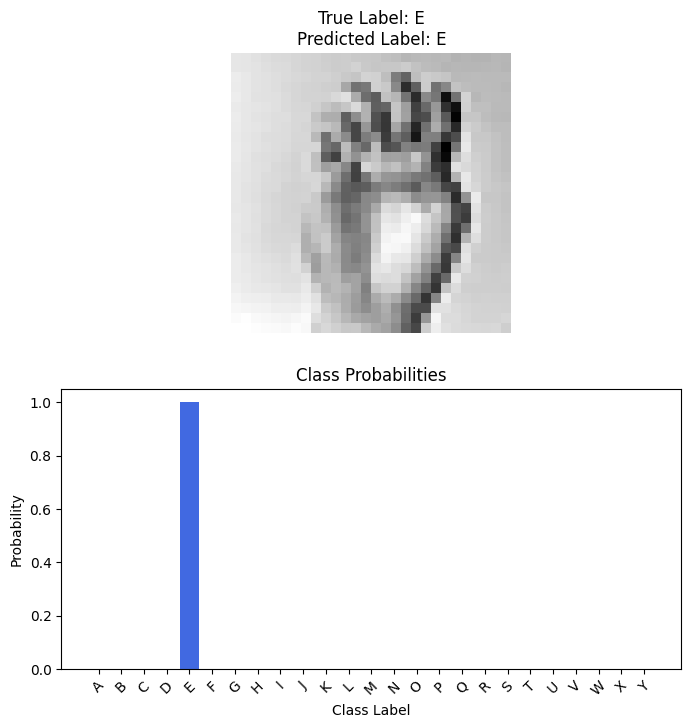

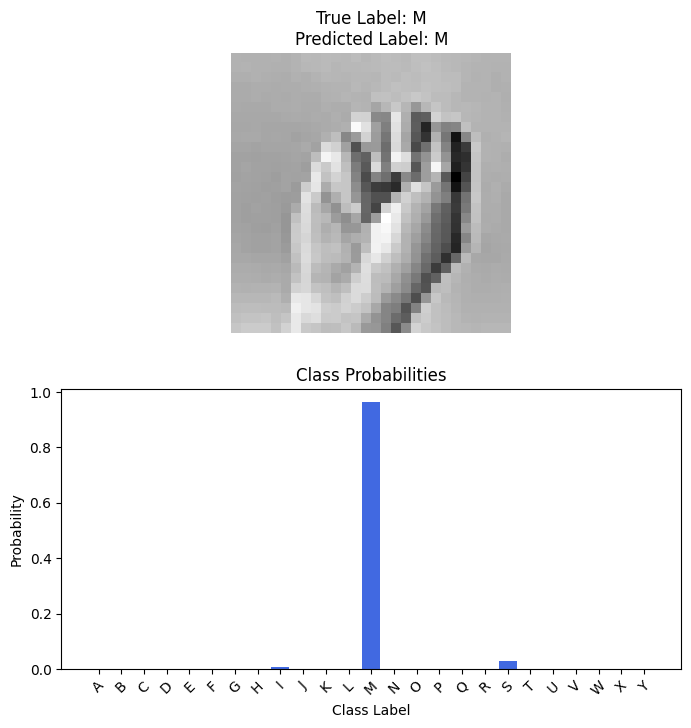

In [151]:
# Function to display a flattened image along with its predicted class and a bar graph of probabilities
def show_prediction(image, true_label, predicted_label, probabilities, class_labels):
    image = image.reshape(28, 28)  # Reshape the flattened image to (28, 28)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {class_labels[true_label]}\nPredicted Label: {class_labels[predicted_label]}')
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.bar(class_labels, probabilities, color='royalblue')
    plt.xlabel('Class Label')
    plt.ylabel('Probability')
    plt.title('Class Probabilities')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()

# Set the model to evaluation mode
model_2.eval()

# Choose some random test samples to display
num_samples_to_display = 5
random_indices = np.random.choice(len(sign_X_test), num_samples_to_display, replace=False)

# Assuming you have a list of class labels for Sign MNIST
class_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]

for i in random_indices:
    image = sign_X_test[i].cpu().numpy()  # Convert image tensor to NumPy array
    true_label = sign_y_test[i].item()

    with torch.no_grad():
        test_output = model_2(sign_X_test[i].unsqueeze(0))  # Model prediction for a single image
        predicted_label = test_output.argmax().item()
        probabilities = torch.softmax(test_output, dim=1).squeeze().cpu().numpy()

    show_prediction(image, true_label, predicted_label, probabilities, class_labels)


## DNN after permutation

Let's see what happens to the accuracies of CNNs after permutating the train and test values.

In [152]:
# Define a permutation on 784 elements
permutation = np.random.permutation(784)

In [153]:
fashion_X_train_perm = fashion_X_train[:, permutation]
fashion_X_test_perm = fashion_X_test[:, permutation]
sign_X_train_perm = sign_X_train[:, permutation]
sign_X_test_perm = sign_X_test[:, permutation]

In [154]:
# Converting Pandas DataFrame to PyTorch tensors
fashion_X_train_perm = torch.tensor(fashion_X_train_perm, dtype = torch.float32)
fashion_y_train_perm = torch.tensor(fashion_y_train, dtype = torch.long)
fashion_X_test_perm = torch.tensor(fashion_X_test_perm, dtype = torch.float32)
fashion_y_test_perm = torch.tensor(fashion_y_test, dtype = torch.long)

sign_X_train_perm = torch.tensor(sign_X_train_perm, dtype = torch.float32)
sign_y_train_perm = torch.tensor(sign_y_train, dtype = torch.long)
sign_X_test_perm = torch.tensor(sign_X_test_perm, dtype = torch.float32)
sign_y_test_perm = torch.tensor(sign_y_test, dtype = torch.long)

In [155]:
# Create a DataLoader for training data
batch_size = 64

fashion_train_dataset_perm = TensorDataset(fashion_X_train_perm, fashion_y_train_perm)
fashion_train_loader_perm = DataLoader(fashion_train_dataset_perm, batch_size=batch_size, shuffle=True)

sign_train_dataset_perm = TensorDataset(sign_X_train_perm, sign_y_train_perm)
sign_train_loader_perm = DataLoader(sign_train_dataset_perm, batch_size=batch_size, shuffle=True)

In [156]:
# Define our DNN model (for the Fashion MNIST)
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)  # Input: 784 features, Output: 256 units
        self.fc2 = nn.Linear(256, 128)  # Input: 256 units, Output: 128 units
        self.fc3 = nn.Linear(128, 10)   # Input: 128 units, Output: 10 units

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [157]:
# Deploying the model on Fashion MNIST

model_3 = DNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_3.parameters(), lr=0.001)


# Training loop (for Fashion MNIST)
epochs = 10
for epoch in range(epochs):
    model_3.train()
    total_loss = 0.0
    for batch_X, batch_y in fashion_train_loader_perm:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move the data to the GPU
        optimizer.zero_grad()
        outputs = model_3(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {total_loss / len(fashion_train_loader_perm):.4f}')

Epoch [1/10] Loss: 0.4440
Epoch [2/10] Loss: 0.3324
Epoch [3/10] Loss: 0.2909
Epoch [4/10] Loss: 0.2640
Epoch [5/10] Loss: 0.2407
Epoch [6/10] Loss: 0.2229
Epoch [7/10] Loss: 0.2046
Epoch [8/10] Loss: 0.1883
Epoch [9/10] Loss: 0.1740
Epoch [10/10] Loss: 0.1611


In [158]:
# Evaluating our model on the test set
model_3.eval()
fashion_X_test_perm, fashion_y_test_perm = fashion_X_test_perm.to(device), fashion_y_test_perm.to(device)  # Move the test data to the GPU
with torch.no_grad():
    test_outputs = model_3(fashion_X_test_perm)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == fashion_y_test_perm).sum().item() / fashion_y_test_perm.size(0)
    print(f'Test Accuracy of DNN on Fashion MNIST (after permutation): {accuracy * 100:.2f}%')

Test Accuracy of DNN on Fashion MNIST (after permutation): 88.97%


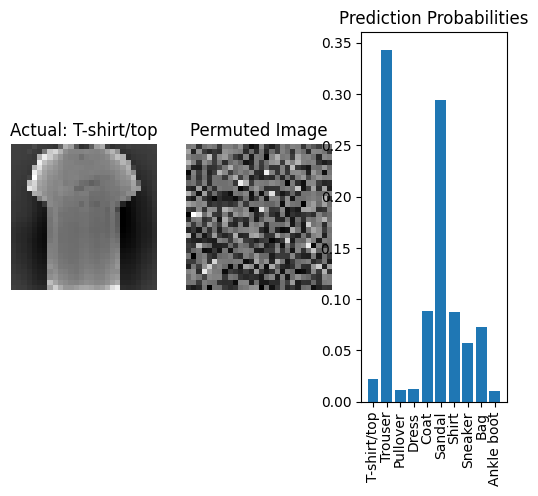

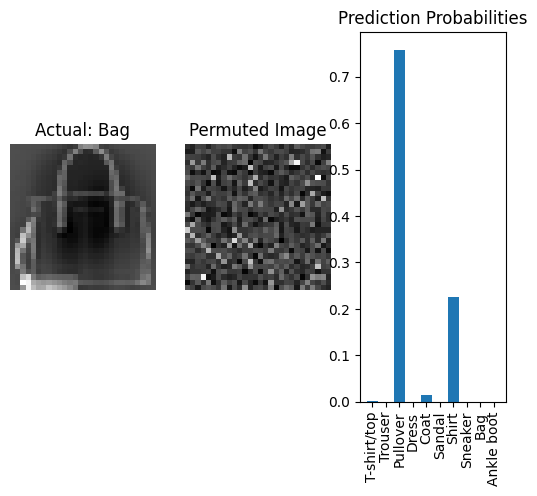

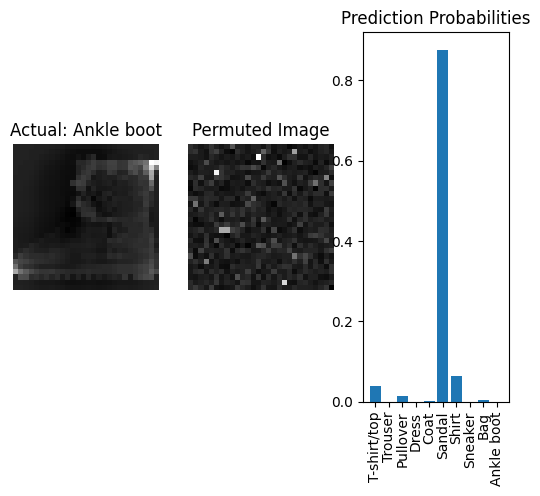

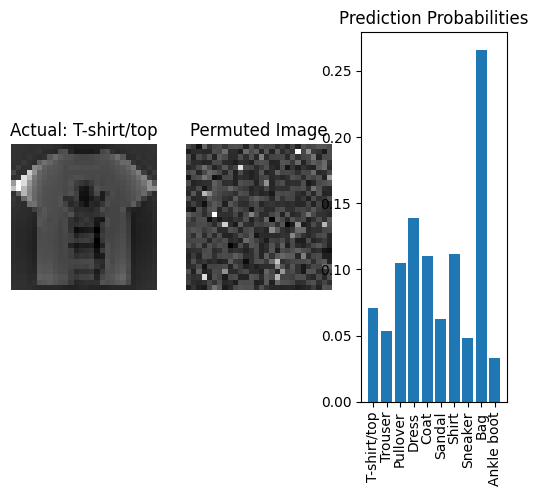

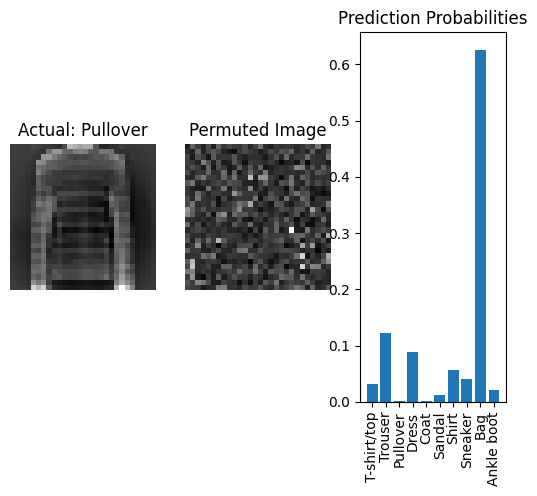

In [159]:
def show_actual_permuted_image_with_probs(model, data_loader, index):
    # Set the model to evaluation mode
    model.eval()

    # Get the example image and label from the specified index
    actual_image, label = data_loader.dataset[index]

    # Permute the image by shuffling its pixels
    permuted_image = actual_image.clone()
    permuted_image = permuted_image[torch.randperm(permuted_image.size(0))]

    # Move the images to the GPU if available
    actual_image = actual_image.to(device)
    permuted_image = permuted_image.to(device)

    # Get the prediction probabilities for the permuted image
    with torch.no_grad():
        test_output = model(permuted_image.unsqueeze(0))  # Add a batch dimension
        prediction_probs = torch.softmax(test_output, dim=1)

    # Get the class names for Fashion MNIST
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    # Display the actual image
    plt.subplot(1, 3, 1)
    plt.title(f'Actual: {class_names[label]}')
    plt.imshow(actual_image.cpu().numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display the permuted image
    plt.subplot(1, 3, 2)
    plt.title('Permuted Image')
    plt.imshow(permuted_image.cpu().numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display the prediction probabilities
    plt.subplot(1, 3, 3)
    plt.title('Prediction Probabilities')
    plt.bar(range(10), prediction_probs.cpu().numpy().squeeze())
    plt.xticks(range(10), class_names, rotation=90)
    plt.show()

# Usage example
for i in range(10,15):
    show_actual_permuted_image_with_probs(model_3, fashion_train_loader, i)


Without permutation, it was 90.23%

In [160]:
# Define our DNN model (for the Sign MNIST)
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)  # Input: 784 features, Output: 256 units
        self.fc2 = nn.Linear(256, 128)  # Input: 256 units, Output: 128 units
        self.fc3 = nn.Linear(128, 25)   # Input: 128 units, Output: 25 units

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [161]:
# Deploying the model on Sign MNIST

model_4 = DNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_4.parameters(), lr=0.001)


# Training loop (for Sign MNIST)
epochs = 6
for epoch in range(epochs):
    model_4.train()
    total_loss = 0.0
    for batch_X, batch_y in sign_train_loader_perm:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move the data to the GPU
        optimizer.zero_grad()
        outputs = model_4(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {total_loss / len(sign_train_loader_perm):.4f}')

Epoch [1/6] Loss: 0.5160
Epoch [2/6] Loss: 0.0073
Epoch [3/6] Loss: 0.0020
Epoch [4/6] Loss: 0.0009
Epoch [5/6] Loss: 0.0005
Epoch [6/6] Loss: 0.0003


In [162]:
# Evaluating our model on the test set
model_4.eval()
sign_X_test_perm, sign_y_test_perm = sign_X_test_perm.to(device), sign_y_test_perm.to(device)  # Move the test data to the GPU
with torch.no_grad():
    test_outputs = model_4(sign_X_test_perm)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == sign_y_test_perm).sum().item() / sign_y_test_perm.size(0)
    print(f'Test Accuracy of DNN on Sign MNIST (after permutation): {accuracy * 100:.2f}%')

Test Accuracy of DNN on Sign MNIST (after permutation): 84.27%


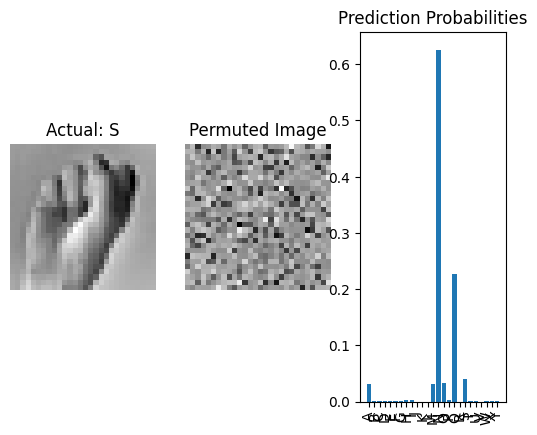

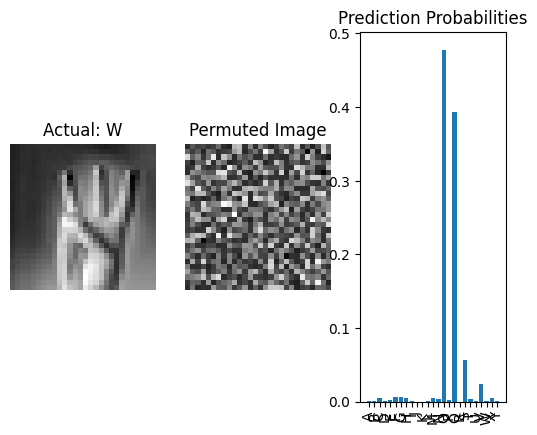

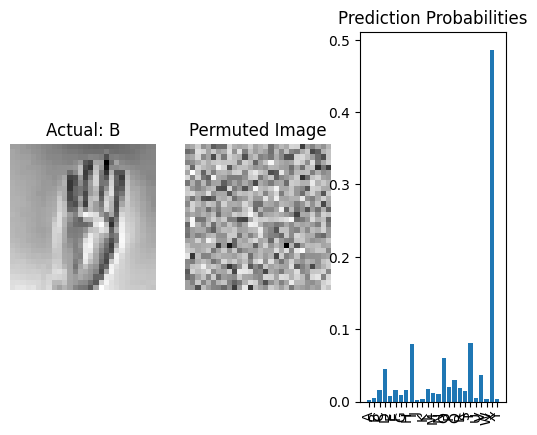

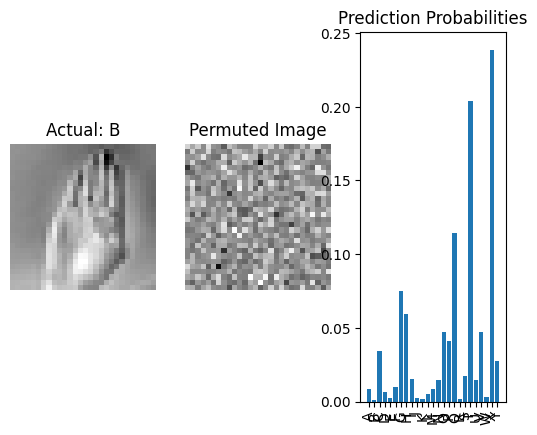

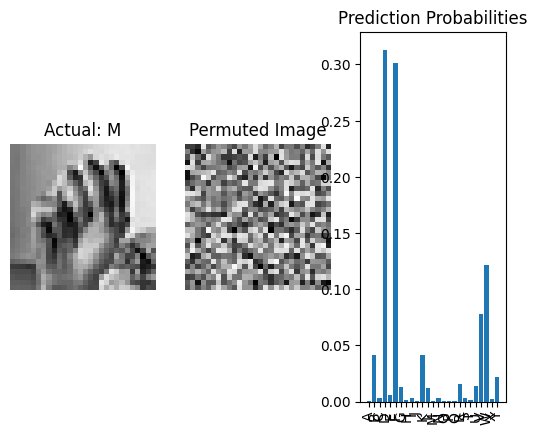

In [163]:

def show_actual_permuted_image_with_probs(model, data_loader, index):
    # Set the model to evaluation mode
    model.eval()

    # Get the example image and label from the specified index
    actual_image, label = data_loader.dataset[index]

    # Permute the image by shuffling its pixels
    permuted_image = actual_image.view(-1)[torch.randperm(28 * 28)].view(1, 784)  # Flatten the 28x28 image

    # Move the images to the GPU if available
    class_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]

    actual_image = actual_image.to(device)
    permuted_image = permuted_image.to(device)

    # Get the prediction probabilities for the permuted image
    with torch.no_grad():
        test_output = model(permuted_image)
        prediction_probs = torch.softmax(test_output, dim=1)

    # Display the actual image
    plt.subplot(1, 3, 1)
    a=label.item()
    plt.title(f'Actual: {class_labels[a]}')
    plt.imshow(actual_image.cpu().numpy().squeeze().reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display the permuted image
    plt.subplot(1, 3, 2)
    plt.title('Permuted Image')
    plt.imshow(permuted_image.cpu().numpy().squeeze().reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    # Display the prediction probabilities
    plt.subplot(1, 3, 3)
    plt.title('Prediction Probabilities')
    plt.bar(range(25), prediction_probs.cpu().numpy().squeeze())
    plt.xticks(range(25), [class_labels[(i)] for i in range(25)], rotation=90)
    plt.show()

for i in range(27,32):
    show_actual_permuted_image_with_probs(model_4, sign_train_loader, i)


Here too, without permutation it was 82.71%

Hence permutation does not affect the accuracies of our models significantly. This means that our models are not learning the optical features of the dataset, such as the corners, shades, shapes present, etc.

In [164]:
fashion_X_train_cnn = fashion_X_train.view(-1, 1, 28, 28)
fashion_X_test_cnn = fashion_X_test.view(-1, 1, 28, 28)
sign_X_train_cnn = sign_X_train.view(-1, 1, 28, 28)
sign_X_test_cnn = sign_X_test.view(-1, 1, 28, 28)

In [165]:
# Create a DataLoader for training data
batch_size = 64

fashion_train_dataset_cnn = TensorDataset(fashion_X_train_cnn, fashion_y_train)
fashion_train_loader_cnn = DataLoader(fashion_train_dataset_cnn, batch_size=batch_size, shuffle=True)

sign_train_dataset_cnn = TensorDataset(sign_X_train_cnn, sign_y_train)
sign_train_loader_cnn = DataLoader(sign_train_dataset_cnn, batch_size=batch_size, shuffle=True)

In [166]:
class CNN(nn.Module): # For Fashion MNIST
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3,padding=0)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=6,padding=0)
        self.conv3 = nn.Conv2d(in_channels=24, out_channels=32, kernel_size=6,padding=0)
        self.fc1 = nn.Linear(8*4*4, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 8*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [167]:
# Deploying the model on the Fashion MNIST

model_5 = CNN(28*28, 10).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_5.parameters(), lr=0.001)

# Training loop (for Fashion MNIST)
epochs = 10
for epoch in range(epochs):
    model_5.train()
    total_loss = 0.0
    for batch_X, batch_y in fashion_train_loader_cnn:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move the data to the GPU
        optimizer.zero_grad()
        outputs = model_5(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {total_loss / len(fashion_train_loader_cnn):.4f}')

Epoch [1/10] Loss: 0.5797
Epoch [2/10] Loss: 0.3854
Epoch [3/10] Loss: 0.3289
Epoch [4/10] Loss: 0.2913
Epoch [5/10] Loss: 0.2670
Epoch [6/10] Loss: 0.2410
Epoch [7/10] Loss: 0.2203
Epoch [8/10] Loss: 0.2040
Epoch [9/10] Loss: 0.1892
Epoch [10/10] Loss: 0.1742


In [168]:
# Evaluating our model on the test set
model_5.eval()
fashion_X_test_cnn, fashion_y_test = fashion_X_test_cnn.to(device), fashion_y_test.to(device)  # Move the test data to the GPU
with torch.no_grad():
    test_outputs = model_5(fashion_X_test_cnn)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == fashion_y_test).sum().item() / fashion_y_test.size(0)
    print(f'Test Accuracy of CNN on Fashion MNIST: {accuracy * 100:.2f}%')

Test Accuracy of CNN on Fashion MNIST: 89.85%


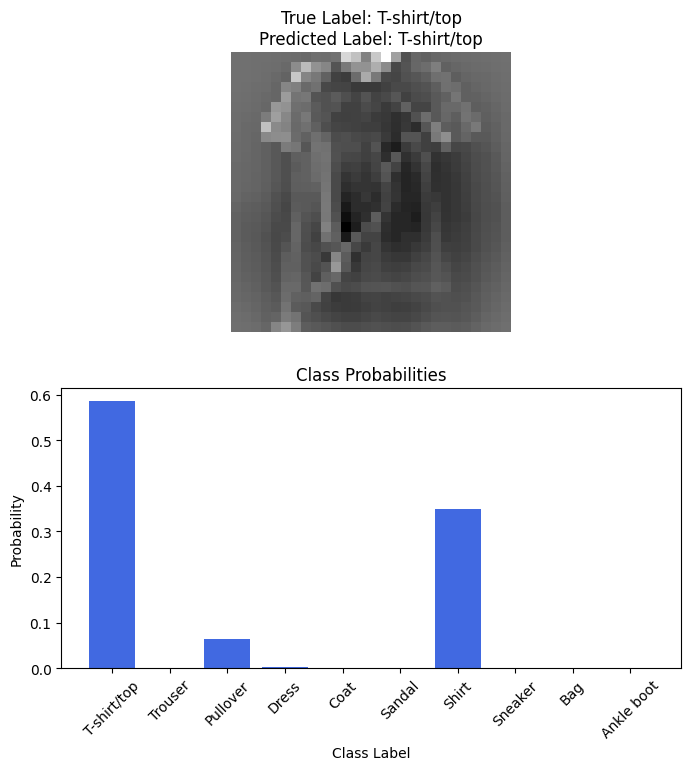

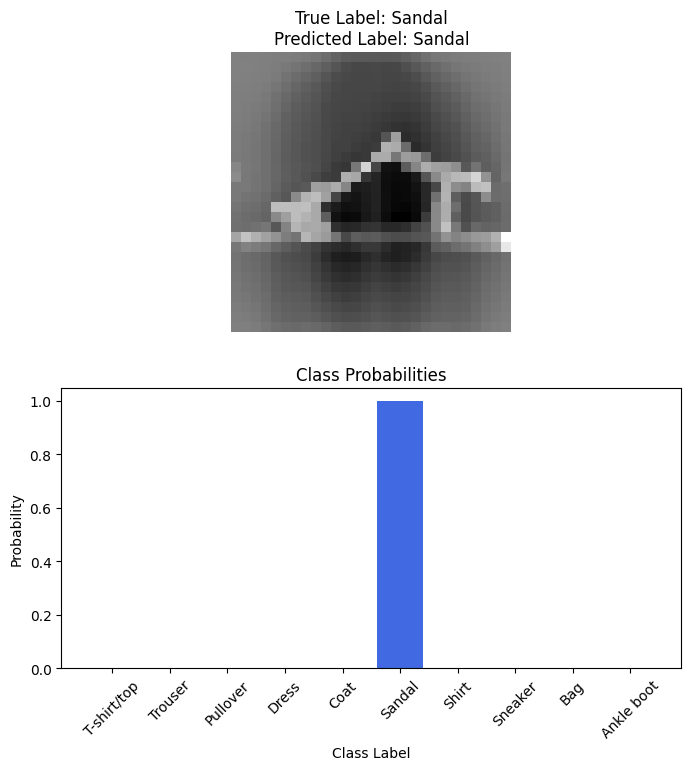

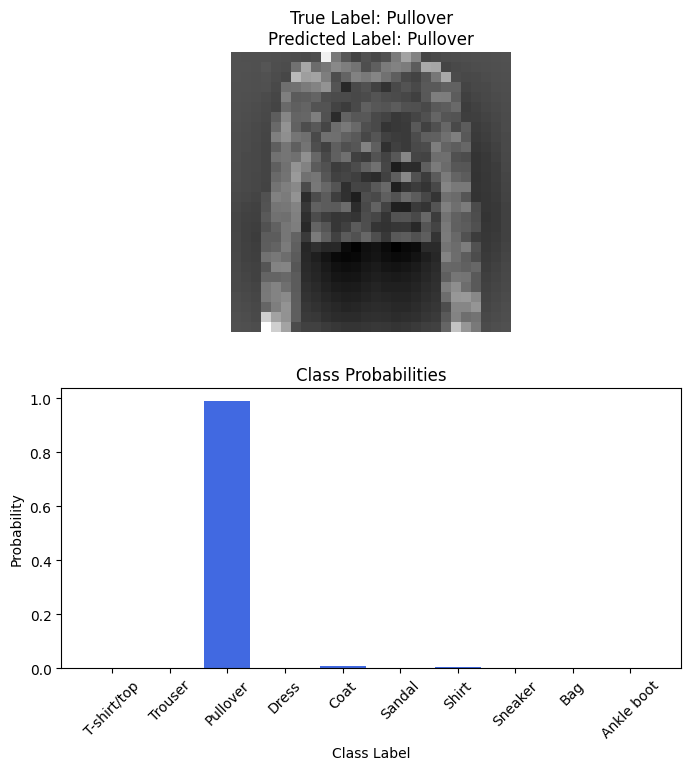

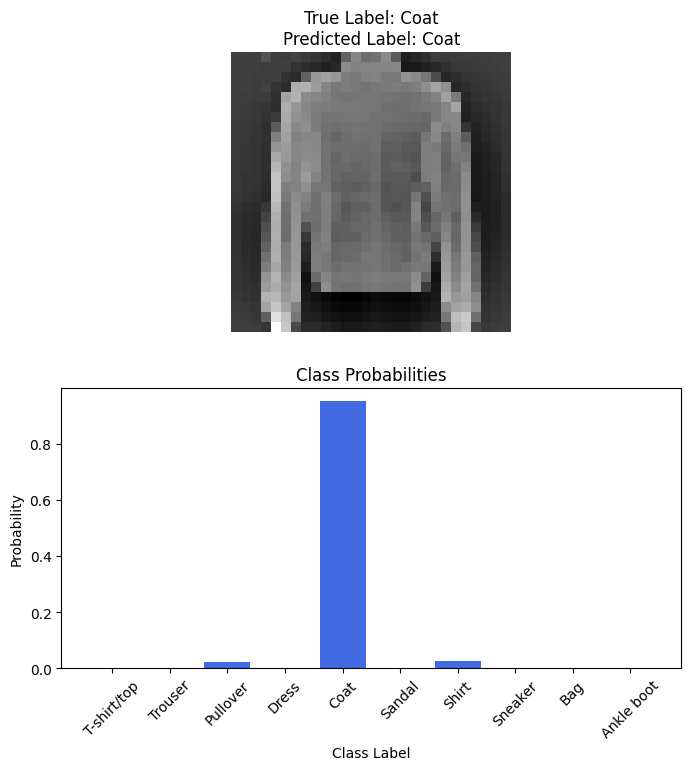

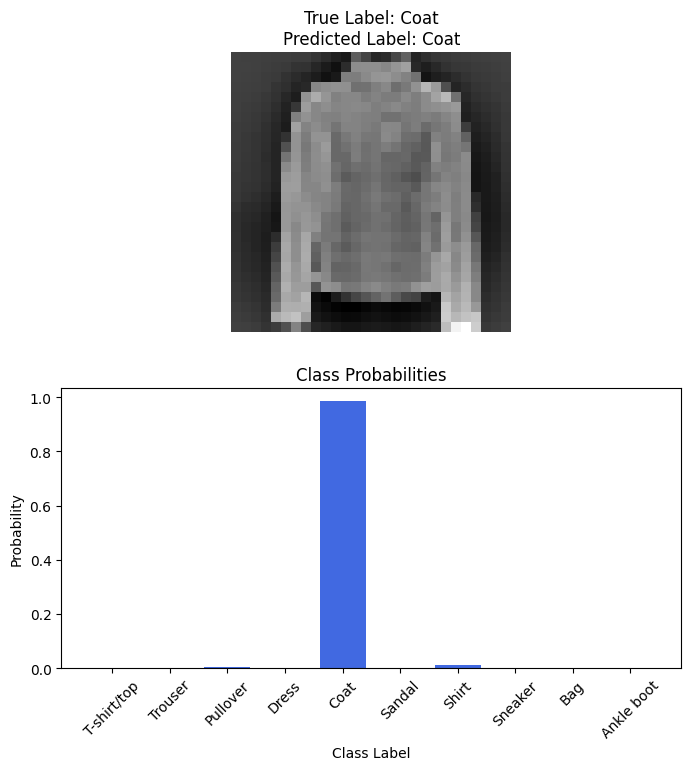

In [169]:
# Function to display an image along with its predicted class and probability as a bar graph
def show_prediction(image, true_label, predicted_label, probabilities, class_labels):
    image = image.squeeze().cpu().numpy()  # Convert image tensor to NumPy array and remove channel dimension

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {class_labels[true_label]}\nPredicted Label: {class_labels[predicted_label]}')
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.bar(class_labels, probabilities, color='royalblue')
    plt.xlabel('Class Label')
    plt.ylabel('Probability')
    plt.title('Class Probabilities')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()

# Set the model to evaluation mode
model_5.eval()

# Choose some random test samples to display
num_samples_to_display = 5
random_indices = np.random.choice(len(fashion_X_test_cnn), num_samples_to_display, replace=False)

# Assuming you have a list of class labels for Fashion MNIST
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in random_indices:
    image = fashion_X_test_cnn[i].unsqueeze(0).to(device)  # Move image to the GPU
    true_label = fashion_y_test[i].item()

    with torch.no_grad():
        test_output = model_5(image)
        predicted_label = test_output.argmax().item()
        probabilities = torch.softmax(test_output, dim=1).squeeze().cpu().numpy()

    show_prediction(image, true_label, predicted_label, probabilities, class_labels)


The accuracy is very similar to that of DNN for the same dataset.

In [170]:
class CNN(nn.Module): # For Sign MNIST
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3,padding=0)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=6,padding=0)
        self.conv3 = nn.Conv2d(in_channels=24, out_channels=32, kernel_size=6,padding=0)
        self.fc1 = nn.Linear(8*4*4, 200)
        self.fc2 = nn.Linear(200, 25)

    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 8*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [171]:
# Deploying the model on the Sign MNIST

model_6 = CNN(28*28, 25).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_6.parameters(), lr=0.001)

# Training loop (for Fashion MNIST)
epochs = 6
for epoch in range(epochs):
    model_6.train()
    total_loss = 0.0
    for batch_X, batch_y in sign_train_loader_cnn:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move the data to the GPU
        optimizer.zero_grad()
        outputs = model_6(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {total_loss / len(sign_train_loader_cnn):.4f}')

Epoch [1/6] Loss: 0.6604
Epoch [2/6] Loss: 0.0197
Epoch [3/6] Loss: 0.0234
Epoch [4/6] Loss: 0.0003
Epoch [5/6] Loss: 0.0001
Epoch [6/6] Loss: 0.0001


In [172]:
# Evaluating our model on the test set
model_6.eval()
sign_X_test_cnn, sign_y_test = sign_X_test_cnn.to(device), sign_y_test.to(device)  # Move the test data to the GPU
with torch.no_grad():
    test_outputs = model_6(sign_X_test_cnn)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == sign_y_test).sum().item() / sign_y_test.size(0)
    print(f'Test Accuracy of CNN on Sign MNIST: {accuracy * 100:.2f}%')

Test Accuracy of CNN on Sign MNIST: 92.93%


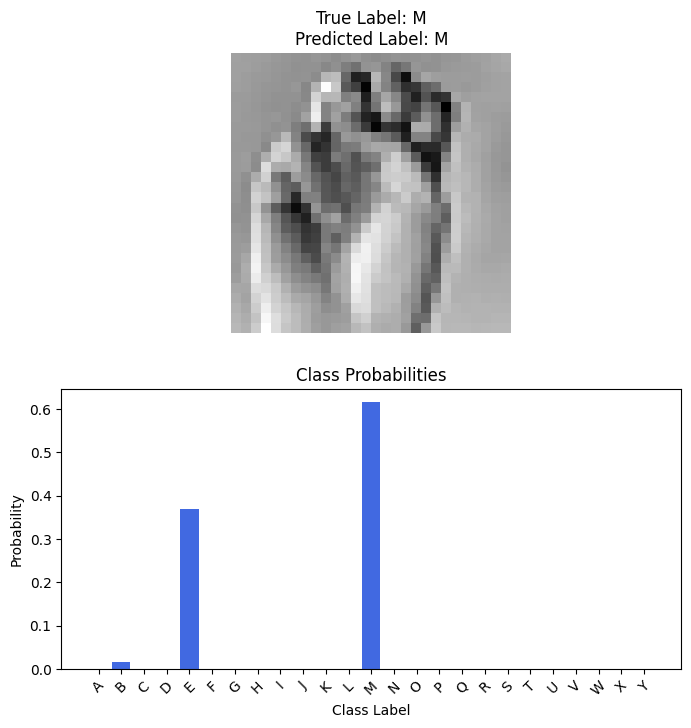

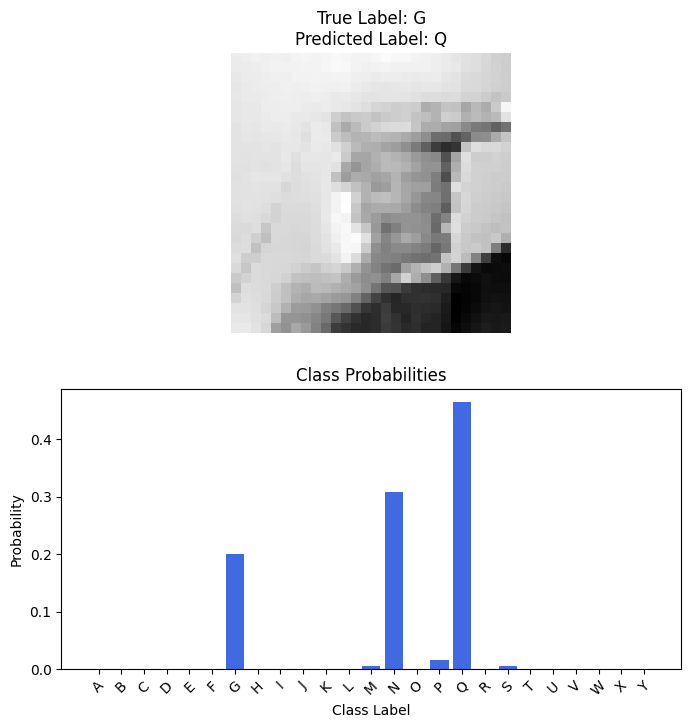

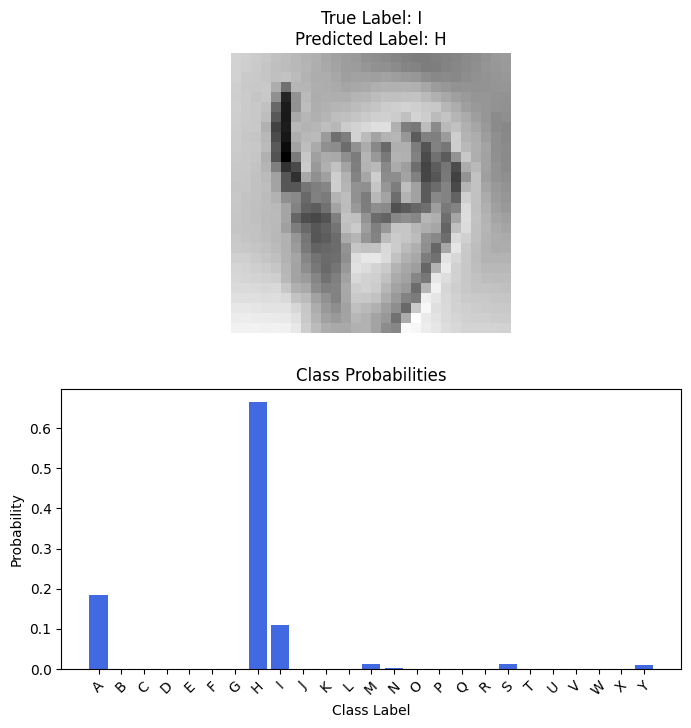

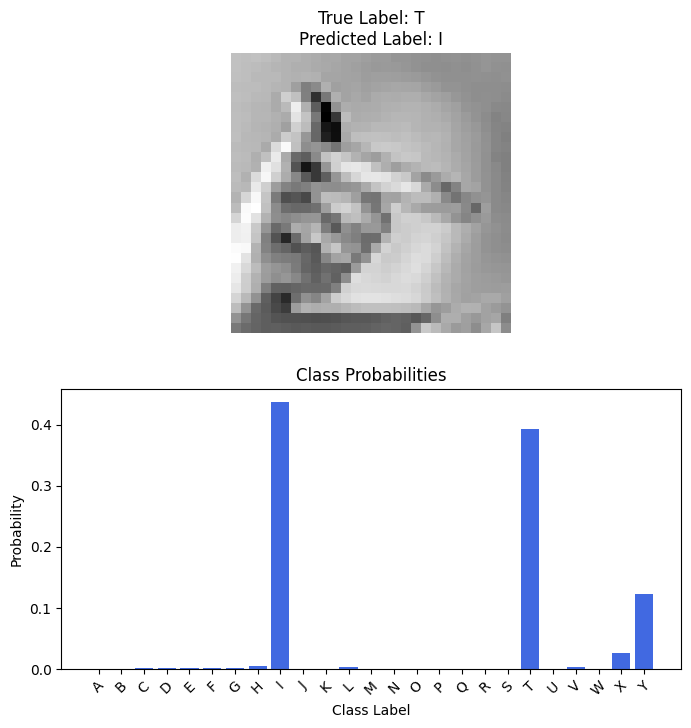

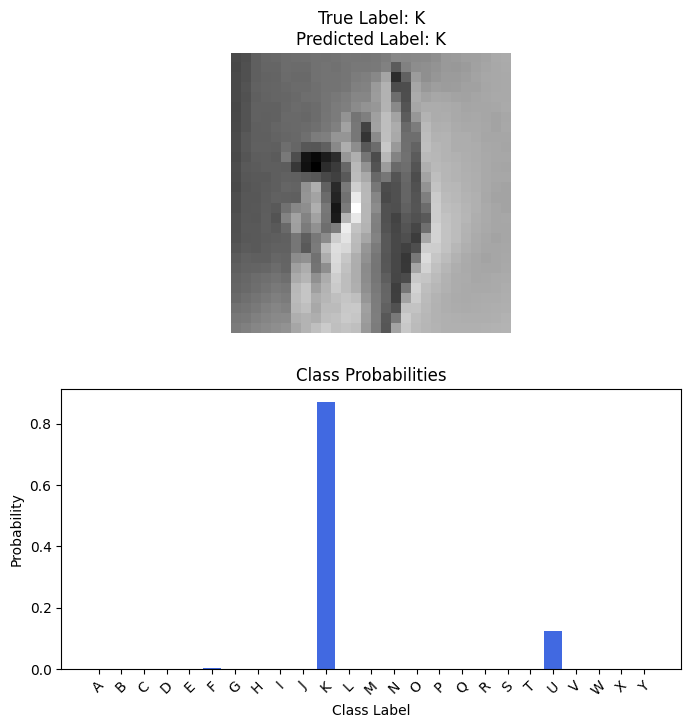

In [173]:
# Function to display a flattened image along with its predicted class and a bar graph of probabilities
def show_prediction(image, true_label, predicted_label, probabilities, class_labels):
    image = image.reshape(28, 28)  # Reshape the flattened image to (28, 28)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {class_labels[true_label]}\nPredicted Label: {class_labels[predicted_label]}')
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.bar(class_labels, probabilities, color='royalblue')  # Exclude the last class label
    plt.xlabel('Class Label')
    plt.ylabel('Probability')
    plt.title('Class Probabilities')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()

# Set the model to evaluation mode
model_2.eval()

# Choose some random test samples to display
num_samples_to_display = 5
random_indices = np.random.choice(len(sign_X_test), num_samples_to_display, replace=False)

# Assuming you have a list of class labels for Sign MNIST
class_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]

for i in random_indices:
    image = sign_X_test[i].cpu().numpy()  # Convert image tensor to NumPy array
    true_label = sign_y_test[i].item()

    with torch.no_grad():
        test_output = model_2(sign_X_test[i].unsqueeze(0))  # Model prediction for a single image
        predicted_label = test_output.argmax().item()
        probabilities = torch.softmax(test_output, dim=1).squeeze().cpu().numpy()

    show_prediction(image, true_label, predicted_label, probabilities, class_labels)



The accuracy increased dramatically than earlier's accuracy of DNN on the same dataset.

## CNN after Perturbation

Now let's apply the pertubation as before and see how CNN performs on them.

In [174]:
fashion_X_train_cnn_perm = fashion_X_train_perm.view(-1, 1, 28, 28)
fashion_X_test_cnn_perm = fashion_X_test_perm.view(-1, 1, 28, 28)
sign_X_train_cnn_perm = sign_X_train_perm.view(-1, 1, 28, 28)
sign_X_test_cnn_perm = sign_X_test_perm.view(-1, 1, 28, 28)

In [175]:
# Create a DataLoader for training data
batch_size = 64

fashion_train_dataset_cnn_perm = TensorDataset(fashion_X_train_cnn_perm, fashion_y_train_perm)
fashion_train_loader_cnn_perm = DataLoader(fashion_train_dataset_cnn_perm, batch_size=batch_size, shuffle=True)

sign_train_dataset_cnn_perm = TensorDataset(sign_X_train_cnn_perm, sign_y_train_perm)
sign_train_loader_cnn_perm = DataLoader(sign_train_dataset_cnn_perm, batch_size=batch_size, shuffle=True)

In [176]:
class CNN(nn.Module): # For Fashion MNIST
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3,padding=0)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=6,padding=0)
        self.conv3 = nn.Conv2d(in_channels=24, out_channels=32, kernel_size=6,padding=0)
        self.fc1 = nn.Linear(8*4*4, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 8*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [177]:
# Deploying the model on the Fashion MNIST

model_7 = CNN(28*28, 10).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_7.parameters(), lr=0.001)

# Training loop (for Fashion MNIST)
epochs = 10
for epoch in range(epochs):
    model_7.train()
    total_loss = 0.0
    for batch_X, batch_y in fashion_train_loader_cnn_perm:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move the data to the GPU
        optimizer.zero_grad()
        outputs = model_7(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {total_loss / len(fashion_train_loader_cnn_perm):.4f}')

Epoch [1/10] Loss: 0.6615
Epoch [2/10] Loss: 0.4086
Epoch [3/10] Loss: 0.3540
Epoch [4/10] Loss: 0.3186
Epoch [5/10] Loss: 0.2906
Epoch [6/10] Loss: 0.2679
Epoch [7/10] Loss: 0.2488
Epoch [8/10] Loss: 0.2302
Epoch [9/10] Loss: 0.2120
Epoch [10/10] Loss: 0.1977


In [178]:
fashion_X_test_cnn_perm.shape, fashion_y_test_perm.shape

(torch.Size([10000, 1, 28, 28]), torch.Size([10000]))

In [179]:
# Evaluating our model on the test set
model_7.eval()
fashion_X_test_cnn_perm, fashion_y_test_perm = fashion_X_test_cnn_perm.to(device), fashion_y_test_perm.to(device)  # Move the test data to the GPU
with torch.no_grad():
    test_outputs = model_7(fashion_X_test_cnn_perm)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == fashion_y_test_perm).sum().item() / fashion_y_test_perm.size(0)
    print(f'Test Accuracy of CNN on Fashion MNIST (after permutation): {accuracy * 100:.2f}%')

Test Accuracy of CNN on Fashion MNIST (after permutation): 87.29%


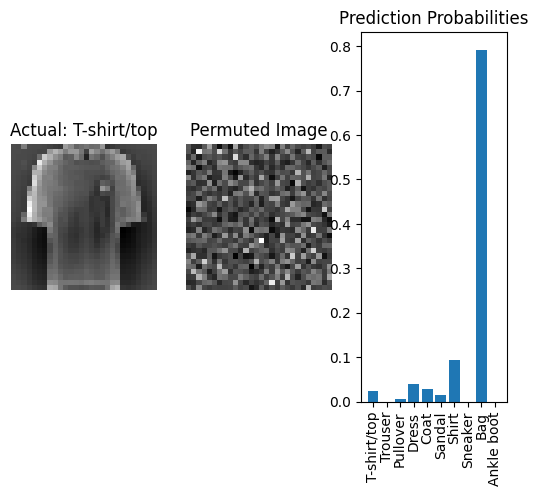

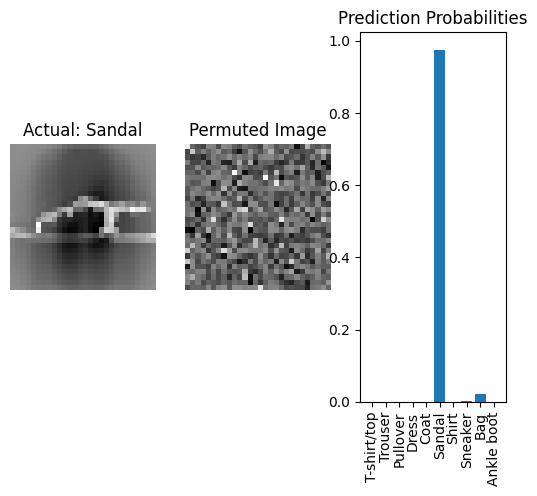

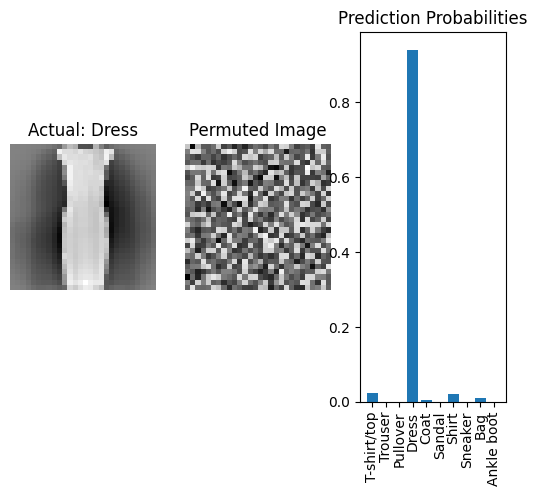

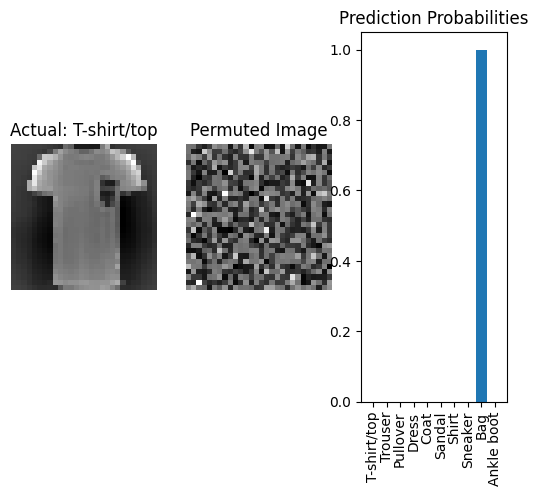

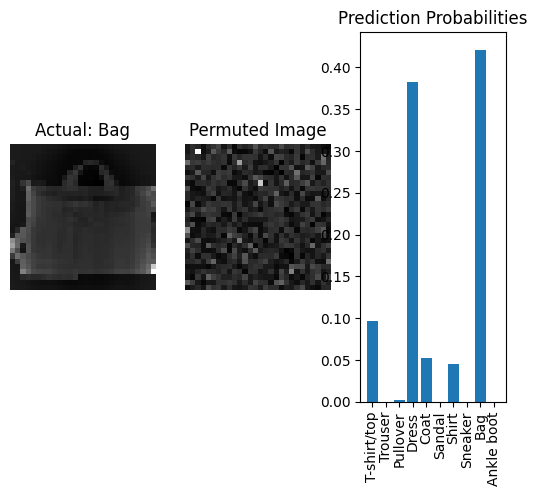

In [180]:
def show_actual_permuted_image_with_probs(model, data_loader, index):
    # Set the model to evaluation mode
    model.eval()

    # Get the example image and label from the specified index
    actual_image, label = data_loader.dataset[index]

    # Permute the image by shuffling its pixels
    permuted_image = actual_image.clone()
    permuted_image = permuted_image[torch.randperm(784)]  # Shuffle the pixels

    # Move the images to the GPU if available
    actual_image = actual_image.to(device)
    permuted_image = permuted_image.to(device)

    # Reshape the images to (1, 28, 28) for display
    actual_image = actual_image.view(1, 28, 28)
    permuted_image = permuted_image.view(1, 28, 28)

    # Get the prediction probabilities for the permuted image
    with torch.no_grad():
        test_output = model(permuted_image)
        prediction_probs = torch.softmax(test_output, dim=1)

    # Display the actual image
    plt.subplot(1, 3, 1)
    plt.title(f'Actual: {fashion_labels[label.item()]}')
    plt.imshow(actual_image.cpu().numpy().squeeze(), cmap='gray')
    plt.axis('off')

    # Display the permuted image
    plt.subplot(1, 3, 2)
    plt.title('Permuted Image')
    plt.imshow(permuted_image.cpu().numpy().squeeze(), cmap='gray')
    plt.axis('off')

    # Display the prediction probabilities
    plt.subplot(1, 3, 3)
    plt.title('Prediction Probabilities')
    plt.bar(range(10), prediction_probs.cpu().numpy().squeeze())
    plt.xticks(range(10), [fashion_labels[(i)] for i in range(10)], rotation=90)
    plt.show()

# Usage example
for i in range(102,107):
    show_actual_permuted_image_with_probs(model_7, fashion_train_loader, i)


In [181]:
class CNN(nn.Module): # For Sign MNIST
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3,padding=0)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=6,padding=0)
        self.conv3 = nn.Conv2d(in_channels=24, out_channels=32, kernel_size=6,padding=0)
        self.fc1 = nn.Linear(8*4*4, 200)
        self.fc2 = nn.Linear(200, 25)

    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 8*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [182]:
# Deploying the model on the Sign MNIST

model_8 = CNN(28*28, 25).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_8.parameters(), lr=0.001)

# Training loop (for Fashion MNIST)
epochs = 6
for epoch in range(epochs):
    model_8.train()
    total_loss = 0.0
    for batch_X, batch_y in sign_train_loader_cnn_perm:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move the data to the GPU
        optimizer.zero_grad()
        outputs = model_8(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {total_loss / len(sign_train_loader_cnn_perm):.4f}')

Epoch [1/6] Loss: 2.1464
Epoch [2/6] Loss: 0.2770
Epoch [3/6] Loss: 0.0287
Epoch [4/6] Loss: 0.0058
Epoch [5/6] Loss: 0.0195
Epoch [6/6] Loss: 0.0024


In [183]:
# Evaluating our model on the test set
model_8.eval()
sign_X_test_cnn_perm, sign_y_test_perm = sign_X_test_cnn_perm.to(device), sign_y_test_perm.to(device)  # Move the test data to the GPU
with torch.no_grad():
    test_outputs = model_8(sign_X_test_cnn_perm)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == sign_y_test_perm).sum().item() / sign_y_test_perm.size(0)
    print(f'Test Accuracy of CNN on Sign MNIST (after permutation): {accuracy * 100:.2f}%')

Test Accuracy of CNN on Sign MNIST (after permutation): 65.13%


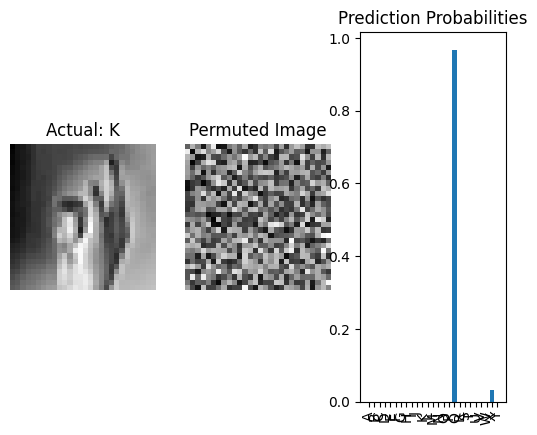

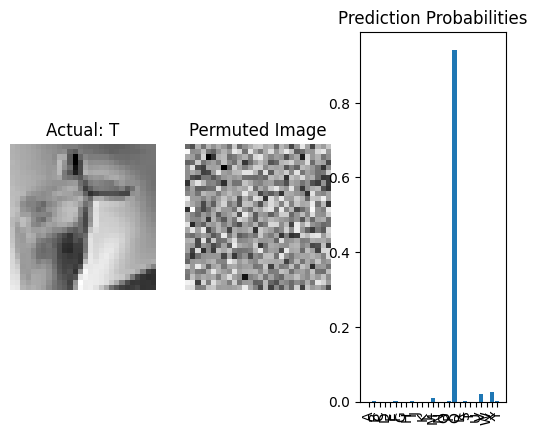

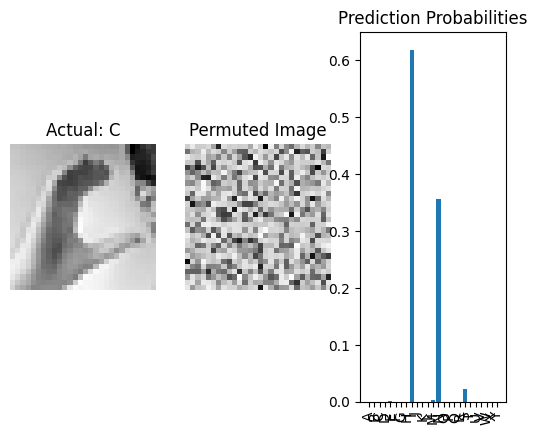

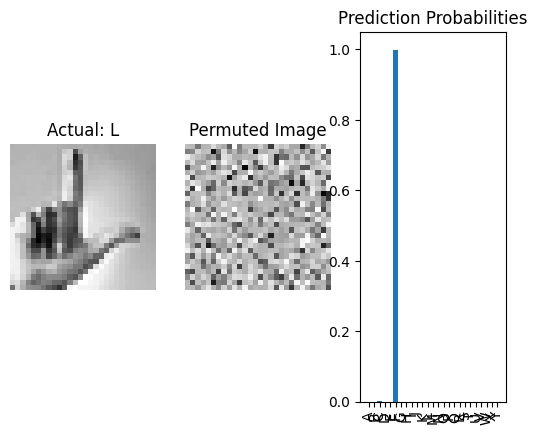

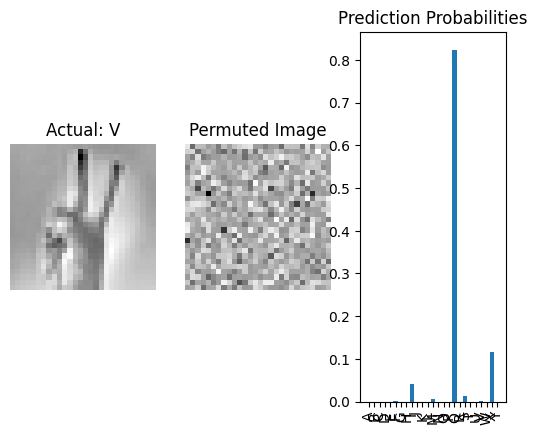

In [184]:

def show_actual_permuted_image_with_probs(model, data_loader, index):
    # Set the model to evaluation mode
    model.eval()
    sign_labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
    # Get the example image and label from the specified index
    actual_image, label = data_loader.dataset[index]

    # Permute the image by shuffling its pixels
    permuted_image = actual_image.clone()
    permuted_image = permuted_image[torch.randperm(784)].view(1, 1, 28, 28)  # Reshape for the CNN model

    # Move the images to the GPU if available
    actual_image = actual_image.to(device)
    permuted_image = permuted_image.to(device)

    # Get the prediction probabilities for the permuted image
    with torch.no_grad():
        test_output = model(permuted_image)
        prediction_probs = torch.softmax(test_output, dim=1)

    # Display the actual image
    plt.subplot(1, 3, 1)
    plt.title(f'Actual: {sign_labels[label.item()]}')
    plt.imshow(actual_image.cpu().numpy().squeeze().reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display the permuted image
    plt.subplot(1, 3, 2)
    plt.title('Permuted Image')
    plt.imshow(permuted_image.cpu().numpy().squeeze().reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display the prediction probabilities
    plt.subplot(1, 3, 3)
    plt.title('Prediction Probabilities')
    plt.bar(range(25), prediction_probs.cpu().numpy().squeeze())
    plt.xticks(range(25), [sign_labels[i] for i in range(25)], rotation=90)
    plt.show()

for i in range(305,310):
    show_actual_permuted_image_with_probs(model_8, sign_train_loader, i)
